[View in Colaboratory](https://colab.research.google.com/github/iluvatar1/ModelingToolsEngineering/blob/master/02-SolucionSistemasNoLineales/Solutions-Nonlinear-equations-examples.ipynb)

# Solutions for the Non-linear systems exercises

**Graphic solution**


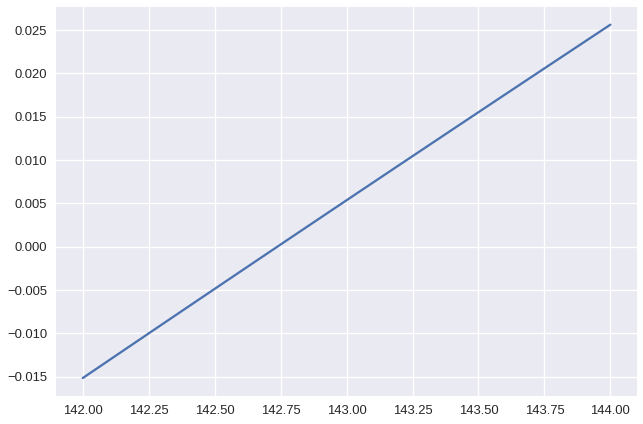

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context("talk")

# define parameters
cd = 0.25
t = 4
v = 36
g = 9.81

# compute mass and function
m = np.linspace(142, 144, 100)
fm = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t) -v

# plot
plt.plot(m, fm)

# savefig
plt.savefig("masa.pdf", dpi=300, bbox_inches='tight')

**Using scipy.optimize.root** 

In [16]:
from scipy import optimize
import numpy as np

# define parameters
cd = 0.25
t = 4
v = 36
g = 9.81


def fun(x):
    #return np.sqrt(g*x/cd)*np.tanh(np.sqrt(g*cd/x)*t) -v
    return np.exp(-x) -x

sol = optimize.root(fun, [0.1])
print("Solution: ", sol.x[0])
print("f(x): ", fun(sol.x[0]))
#print(sol)

Solution:  0.5671432904097838
f(x):  0.0


In [24]:
#@title Testing variables { run: "auto" }
v = 16 #@param {type:"slider", min:5, max:50, step:0.5}
from scipy import optimize
import numpy as np



# define parameters
cd = 0.25
t = 4
#v = 36
g = 9.81


def fun(x):
    return np.sqrt(g*x/cd)*np.tanh(np.sqrt(g*cd/x)*t) -v
    #return np.exp(-x) -x

sol = optimize.root(fun, [0.1])
print("Solution (for v={}): {}".format(v,  sol.x[0]))
#print("f(x): ", fun(sol.x[0]))
#print(sol)

Solution (for v=16): 6.736376219179872


**Using Sympy**

In [21]:
import sympy as sym
x, a = sym.symbols('x a')
res = sym.solveset(x**2-a, x)
print(res)

{-sqrt(a), sqrt(a)}


In [8]:
import sympy as sym
x, y, z = sym.symbols('x y z')
res = sym.nonlinsolve([sym.sin(x) + y**2 + sym.ln(z) - 7, 
                       3*x + 2**y -z**3 + 1, 
                       x + y + z - 5], [x, y, z])
print("Solution from SymPy: ", res)
print()
      
      
import numpy as np
from scipy import optimize
def fun(x) :
  return [np.sin(x[0]) + x[1]**2 + np.log(x[2]) - 7, 
          3*x[0] + 2**x[1] - x[2]**3 + 1, 
          x[0] + x[1] + x[2] - 5]
sol = optimize.root(fun, [1, 1, 1])
print("Solution from Scipy: ", sol)
print(-sol.x[1] - sol.x[2] + 5)

Solution from SymPy:  {(-y - z + 5, y, z)}

Solution from Scipy:      fjac: array([[-2.89123927e-01, -9.15605969e-01, -2.79415576e-01],
       [ 9.57291375e-01, -2.76765456e-01, -8.36307658e-02],
       [ 7.59750852e-04,  2.91661776e-01, -9.56521213e-01]])
     fun: array([5.75216319e-10, 3.52395535e-09, 0.00000000e+00])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([ 6.18644926e-08,  7.73866142e-09, -1.87482439e-08])
       r: array([-3.57889864, -4.6852964 ,  9.88315081,  3.69654345,  3.8022166 ,
       -4.26492224])
  status: 1
 success: True
       x: array([0.59905376, 2.3959314 , 2.00501484])
0.5990537567429417


## Scalar equations

In [1]:
from scipy import optimize
import numpy as np

def f(x):
    return np.sin(np.sqrt(x)) -x
def g(x):
    return x**3-6*x**2+11*x-6.1

sol = optimize.root(f, [0.5],  method='hybr')
print("Solution: ", sol.x)
print("f(x): ", f(sol.x[0]))
print(sol)

sol = optimize.root(g, [3.5],  method='hybr')
print("Solution: ", sol.x)
print("f(x): ", g(sol.x[0]))
print(sol)

Solution:  [0.76864886]
f(x):  -1.1102230246251565e-16
    fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.46841428e-11])
       r: array([0.63519354])
  status: 1
 success: True
       x: array([0.76864886])
Solution:  [3.04668053]
f(x):  1.652011860642233e-13
    fjac: array([[-1.]])
     fun: array([1.65201186e-13])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.56524091e-08])
       r: array([-2.28664498])
  status: 1
 success: True
       x: array([3.04668053])


## Bungee jumping

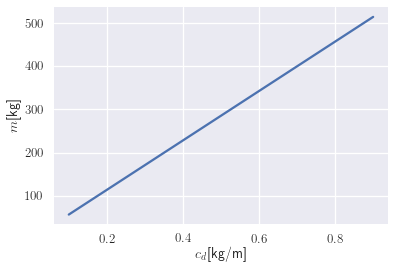

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # this improves the figures aesthetics

from matplotlib import rc
rc('text', usetex=True) # use latex rendering

sns.set() # activate seaborn
sns.set_context("talk") # increase fonts and imporove look for a talk

cd = np.linspace(0.1, 0.9, 17)
g = 9.81
v = 36
t = 4

def f(x, cd):
    return np.sqrt(g*x/cd)*np.tanh(np.sqrt(g*cd/x)*t) - v
def r(cd):
    sol = optimize.root(f, args=(cd), x0=[0.5],  method='hybr')
    return sol.x
x = np.zeros_like(cd)
for ii, CD in enumerate(cd):
    x[ii] = optimize.root(f, args=(CD), x0=[0.5],  method='hybr').x[0]

fig, ax = plt.subplots()
ax.plot(cd, x)
ax.set_xlabel(r"$c_d$[kg/m]")
ax.set_ylabel(r"$m$[kg]")
fig.savefig("images/fm.png", dpi=300, bbox_inches='tight')

## Intersection of 3D objects

Solution:  [0.61803399 1.61803399]


(-1.7320508075688772, 1.7320508075688772)

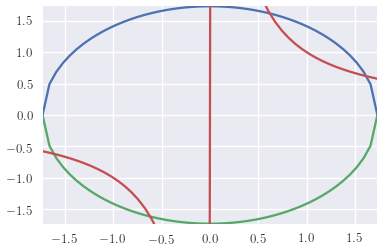

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns # this improves the figures aesthetics
from matplotlib import rc
rc('text', usetex=True) # use latex rendering
from scipy import optimize
import numpy as np

# x is a list (x[0] = x, x[1] = y)
def fun(x):
    return [x[0]**2  + x[1]**2- 3.0, x[0]*x[1] - 1]

sol = optimize.root(fun, [0.5, 1.5])
print("Solution: ", sol.x)

fig, ax = plt.subplots()
x = np.linspace(-np.sqrt(3), np.sqrt(3), 50)
ax.plot(x, np.sqrt(3 - x*x))
ax.plot(x, -np.sqrt(3 - x*x))
ax.plot(x, 1.0/x)
ax.set_xlim([-np.sqrt(3), np.sqrt(3)])
ax.set_ylim([-np.sqrt(3), np.sqrt(3)])


In [0]:
ax.set_xlim([-np.sqrt(3), np.sqrt(3)])
